Name : J Karan Tejas

Roll No : 191EE126

In [ ]:
import numpy as np
import IPython
from IPython.display import Audio , display
import scipy
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import pandas as pd

In [ ]:
alpha = 1 + 126 % 4  
pi = np.pi

$\alpha = 3$

# Problem 1

In [ ]:
plt.rcParams.update({
    "figure.figsize": (12,10),
    "font.size": 12})

In [ ]:
def x(t,a):
    return np.exp(-t/a)

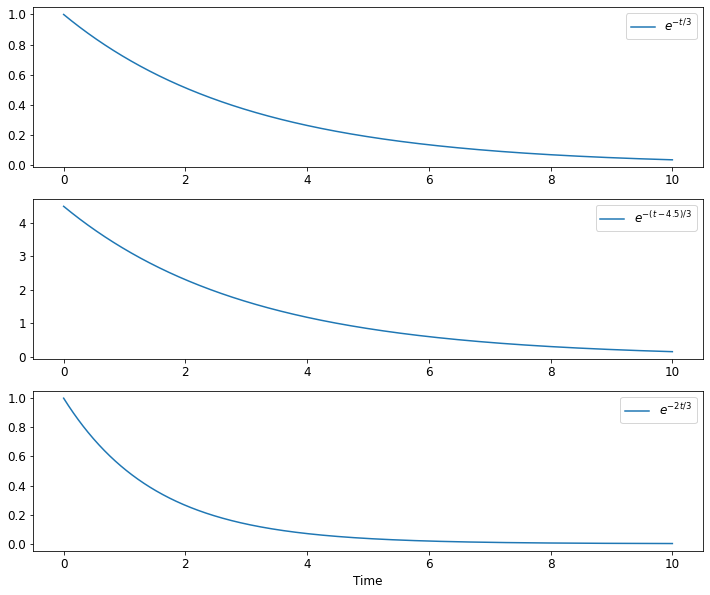

In [ ]:
t = np.linspace(0 , 10 , num = 1001 )
signal1 = x(t , alpha)
signal2 = x(t - 1.5 * alpha , alpha)
signal3 = x(2 * t, alpha)

plt.subplot(3,1,1)
plt.plot(t,signal1,label = '$e^{-t/3}$')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,signal2,label = '$e^{-(t - 4.5)/3}$' )
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,signal3,label = '$e^{-2t/3}$')
plt.xlabel("Time")
plt.legend()

In [ ]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})


_X($\Omega$)_$\ = \frac{1}{(\frac{1}{\alpha} + j\Omega)}$

_Maginitude Spectrum_ $= |X(\Omega)|$ $= \frac{1}{\sqrt{\alpha^2 + \Omega^2}}$

_Phase Spectrum_ $= \arctan{\frac{\Omega}{\alpha}}$

_X2($\Omega$)_$\ = e^{-4.5j\Omega} X(\Omega)\$ ( x2(t) = x(t - 4.5) )

_X3($\Omega$)_$\ = \frac{X(\frac{\Omega}{2})}{2}$ ( x3(t) = x(2t) )

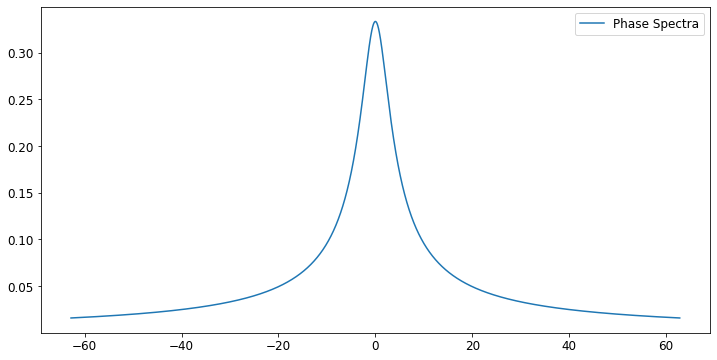

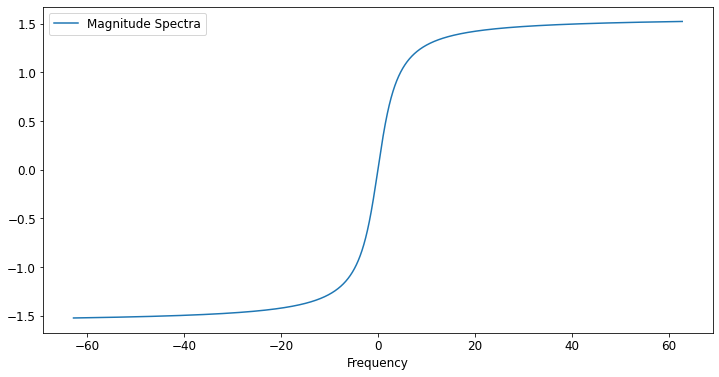

In [ ]:
w = 2 * pi * np.linspace(-10,10,num = 10001)
freq = (1/np.sqrt(3*3 + w**2))
mag = np.arctan2(w, 3)


plt.plot(w,freq,label = 'Phase Spectra')
plt.legend()
plt.figure()
plt.plot(w,mag,label = 'Magnitude Spectra')
plt.xlabel("Frequency")
plt.legend()

# Problem 2

In [ ]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
freq1 = 200 * alpha
freq2 = 220 * alpha
t = np.linspace(0, 4.999, num = 5000)
signal1 = np.sin(2 * pi * freq1 * t)
signal2 = np.sin(2 * pi * freq2 * t)
signal = np.append(signal1,signal2,axis = 0)
wavfile.write('prob2op.wav',1000, signal.astype(np.float32))

display(Audio('prob2op.wav',rate = 1000))


In [ ]:
plt.plot(t[0:100],signal[0:100])
plt.ylabel('Signal')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

In [ ]:
plt.stem(t[0:100],signal[0:100])
plt.ylabel('Signal')
plt.xlabel('Time')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Time')

# Problem 3

In [ ]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})

<Figure size 864x432 with 0 Axes>

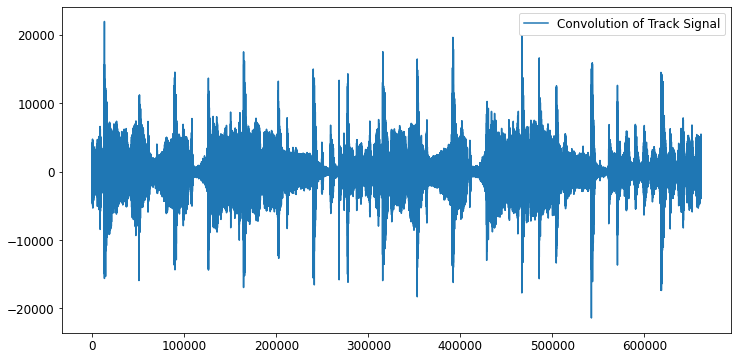

<Figure size 864x432 with 0 Axes>

In [27]:
conv_text = np.loadtxt('ConvFile3.txt', dtype=float)
F, track1 = wavfile.read('Track003.wav')
track1 = track1/32767.0

track = []
for i in range(len(track1)):
    track.append(track1[i][0])

#mode = same
c1 = np.convolve(conv_text, track, mode='same')
c1 = (c1 * 32767.0).astype(np.int16)
#mode = valid
c2 = np.convolve(conv_text, track, mode='valid')
c2 = (c2 * 32767.0).astype(np.int16)
#mode = full
c3 = np.convolve(conv_text, track, mode='full')
c3 = (c3 * 32767.0).astype(np.int16)

wavfile.write('prob3op1.wav', F, c1)
display(Audio(data = c1, rate = F))
wavfile.write('prob3op2.wav', F, c2)
display(Audio(data = c2, rate = F))
wavfile.write('prob3op3.wav', F, c3)
display(Audio(data = c3, rate = F))

t1 = np.arange(0,len(conv_text))
plt.plot(t1,conv_text,label = 'Convolution Kernel')
plt.legend()
plt.figure()
plt.plot(np.arange(0, len(track)), track,label = 'Track Signal')
plt.legend()
plt.figure()
t1 = np.arange(0,len(c1))
plt.plot(t1,c1, label = 'Convolution of Track Signal')
plt.legend()
plt.figure()



From the plots of the convolved signal, it can be seen that low frequencies have been suppressed. Hence the ConvFile3 contains samples from a High Pass filter.

# Problem 4

In [ ]:
def multiply_signals(x, f, Fs):
    w = 2*pi*(float(f) / Fs)
    return np.multiply(x, np.cos(w * np.arange(0,len(x))))

In [ ]:
F, speech = wavfile.read('speech.wav')
IPython.display.Audio(speech, rate=F)

y = multiply_signals(speech,500,F)
IPython.display.Audio(y, rate=F)

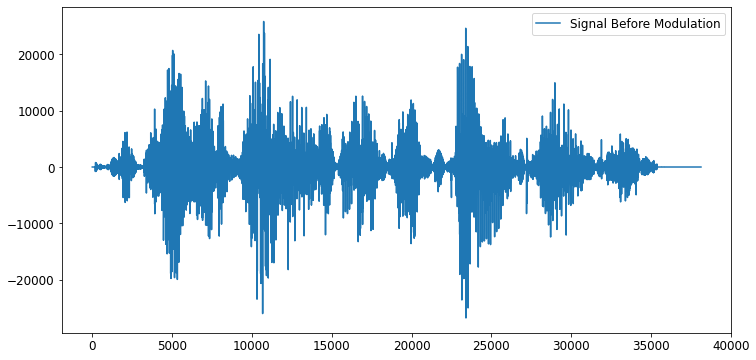

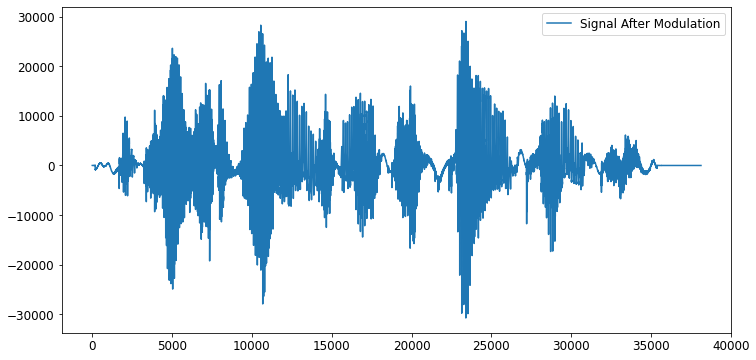

In [ ]:
t = np.arange(0, len(speech))
plt.plot(t, y,label = 'Signal Before Modulation')
plt.legend()
plt.figure()
plt.plot(t,speech,label = 'Signal After Modulation')
plt.legend()

In [ ]:
def plot_spec(x, F, max_freq=None, do_fft=True, title = None):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(F) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = F * np.arange(0, C) / len(x);
    plt.plot(N, X)
    plt.title(title)
    plt.xlabel(r'$\gamma$')
    plt.ylabel(r'$\hat{x}(\gamma)$')
    plt.figure()
    return N, X

(array([0.00000000e+00, 4.19661124e-01, 8.39322247e-01, ...,
        7.99874102e+03, 7.99916068e+03, 7.99958034e+03]),
 array([1179833.605536  , 1217214.06005538, 1163872.15602042, ...,
         228608.69469601,   40455.30936305,   60185.82048473]))

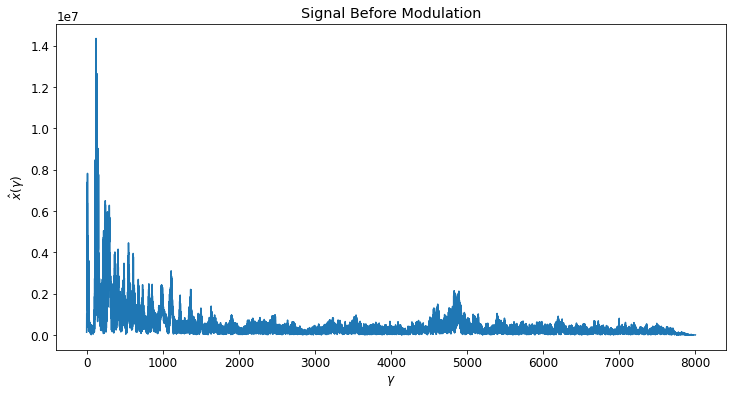

<Figure size 864x432 with 0 Axes>

In [ ]:
plot_spec(speech, F, F/2, title = 'Signal Before Modulation')
plot_spec(y, F, F/2, title = 'Signal After Modulation')